# Model for Traffic Sign Recognition for Autonmous Driving

### Description

**The German Traffic Sign Recognition Benchmark (GTSRB) is a multi-class image classification benchmark in the domain of advanced driver assistance systems and autonomous driving.** 
It was first published at IJCNN 2011

**For more Information about Dataset Refer: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset**

- Total sign Classes : 43 <br>
- Total Training Images : More than 39000 <br>
- Images contain a border of 10 % around the actual traffic sign (at least 5 pixels) to allow for edge-based approaches <br>
- Images are stored in PPM format (Portable Pixmap, P6)<br>
- Image sizes vary between 15x15 to 250x250 pixels <br>
- Images are not necessarily squared <br>
- The actual traffic sign is not necessarily centered within the image.This is true for images that were close to the image border in the full camera image <br>


## Download Train & Test Dataset

In [ ]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

In [78]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip

--2019-09-10 17:34:13--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99620 (97K) [application/zip]
Saving to: ‘GTSRB_Final_Test_GT.zip’

GTSRB_Final_Test_GT 100%[===================>]  97.29K   119KB/s    in 0.8s    

2019-09-10 17:34:15 (119 KB/s) - ‘GTSRB_Final_Test_GT.zip’ saved [99620/99620]



## Unzip & Analyse Directory Tree of Downlaoded Dataset

In [82]:
import os
import zipfile

# unzip training dataset
local_zip = 'GTSRB_Final_Training_Images.zip' 
with zipfile.ZipFile(local_zip, 'r') as zipobj:  # open a zip file in read mode
  zipobj.extractall('GTSRB_Final_Training_Images')  
#   zip.printdir()    # Display contents of zip file

# unzip validation dataset
local_zip = 'GTSRB_Final_Test_Images.zip'
with zipfile.ZipFile(local_zip, 'r') as zipobj:  # open a zip file in read mode
  zipobj.extractall('GTSRB_Final_Test_Images')  

# walk through the extracted training directory
for root, directories, files in os.walk('GTSRB_Final_Training_Images'): 
  print(root)
  print(directories)
#   print(files)
  
# walk through the extracted validation directory
for root, directories, files in os.walk('GTSRB_Final_Test_Images'): 
  print(root)
  print(directories)
  print(files[:10])

GTSRB_Final_Training_Images
['GTSRB']
GTSRB_Final_Training_Images/GTSRB
['Final_Training']
GTSRB_Final_Training_Images/GTSRB/Final_Training
['Images']
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images
['00021', '00004', '00014', '00020', '00016', '00023', '00018', '00001', '00042', '00033', '00040', '00009', '00015', '00017', '00024', '00002', '00036', '00000', '00041', '00030', '00008', '00028', '00026', '00034', '00011', '00006', '00032', '00010', '00012', '00037', '00005', '00007', '00029', '00031', '00003', '00035', '00013', '00025', '00019', '00022', '00038', '00039', '00027']
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021
[]
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00004
[]
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00014
[]
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00020
[]
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00016
[]
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00023
[]
GTSRB_Final_Tra

## Get Root path of Train Dataset

In [46]:
train_sign_dir = os.path.join('GTSRB_Final_Training_Images/GTSRB/Final_Training/Images')  # join dir and subdir path
print(train_sign_dir)

GTSRB_Final_Training_Images/GTSRB/Final_Training/Images


## Get some Class Names of Traffic Signs

In [47]:
train_sign_names = os.listdir(train_sign_dir)
print(train_sign_names[:10])   # display first 10 class names of Traffic Signs

['00021', '00004', '00014', '00020', '00016', '00023', '00018', '00001', '00042', '00033']


## Get Full path with Image name for Analysis

In [77]:
import os
import glob  # Used to get linux like directory and file structure

all_img_paths = glob.glob(os.path.join(train_sign_dir, '*/*.ppm'))


print('\n'.join(map(str, all_img_paths[:10]))) 
# # all_img_paths[:10]

GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00002_00023.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00001_00029.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00000_00011.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00004_00007.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00006_00004.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00004_00029.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00007_00015.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00010_00006.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00007_00006.ppm
GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00021/00003_00027.ppm


## Define Hyper Parameters

In [ ]:
NUM_CLASSES = 43
IMG_SIZE = 48

## Display actual Stored Traffic Sign Image

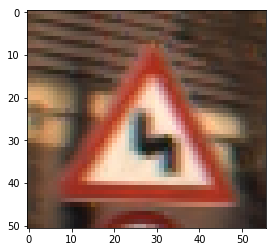

In [58]:
# Display matplotlib images inside the notebook 
%matplotlib inline    

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = plt.imread(all_img_paths[0])

plt.imshow(img)

In [ ]:
# from keras.utils import to_categorical
# y_train = to_categorical(labels, num_classes = NUM_CLASSES)

## Import Tensorflow Library

In [49]:
# !pip install tensorflow==2.0.0-rc0  to install tensorflow 2.0.0 in colab/kaggle
import tensorflow as tf
print(tf.__version__)

1.14.0


# Define Model and Display Its Summary

In [50]:
model = tf.keras.models.Sequential([
    # 1st convolution layer    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # 4th convolution layer
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # 5th convolution layer
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])    
    
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

## Compile the Model

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Preprocess the Images to defined size in Hyperparameters

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1.0/255 to normalize the data
# ImageDataGenerator: generate batches of tensor image data with real-time data augmentation.
train_datagen = ImageDataGenerator(rescale=1.0/255) 
# validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow training images in batches of 128 using train_datagen generator
# The name of sub directory will be the lables for the contained image
train_generator = train_datagen.flow_from_directory(
        train_sign_dir,  # This is the source directory for training images
        # Using target size; All images will be resized automatically to IMG_SIZE on runtime. 
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 150x150
        batch_size=128,      # Images are loaded in the batches of 128 images per batch
        class_mode='sparse')  

# # validation generator for validation image directory
# validation_generator = validation_datagen.flow_from_directory(
#         '/tmp/validation-horse-or-human/',  # This is the source directory for training images
#         target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 150x150
#         batch_size=32,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')


Found 39209 images belonging to 43 classes.


## Train the Model

In [53]:
history = model.fit_generator(
      train_generator,  # stream the generated normalized batch of images from training image dir
    # steps_per_epoch=306 because batch_size=32. So, 306*128=39168 ie. 306 epochs are required to pass
    # all images to model.
      steps_per_epoch=306, 
      epochs=10, # No. of times for which whole dataset is passed to the model for training
#       validation_data=validation_generator,
#       validation_steps=8,  # Total 256 validation images. So, 32(batch_size)x8=256
      verbose=1) # decides how much data/logs to be displayed on screen during training

Epoch 1/10
306/306 [==============================] - 15s 51ms/step - loss: 1.2157 - acc: 0.6693
Epoch 2/10
306/306 [==============================] - 12s 39ms/step - loss: 0.1523 - acc: 0.9583
Epoch 3/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0710 - acc: 0.9810
Epoch 4/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0440 - acc: 0.9876
Epoch 5/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0249 - acc: 0.9932
Epoch 6/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0246 - acc: 0.9931
Epoch 7/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0171 - acc: 0.9954
Epoch 8/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0135 - acc: 0.9962
Epoch 9/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0098 - acc: 0.9969
Epoch 10/10
306/306 [==============================] - 12s 39ms/step - loss: 0.0101 - acc: 0.9973


## Test the Model
The Class of any traffic sign can be identified by the directory it contains. for eg. 
In GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00009/00042_00002.ppm; this image belogs to a class 9 out of total 43 classes. <br>
In the prediction: <br>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] <br>
Notice that 1 is present at location 9 (startig from 0), So, if it is same as the class number, then prediction is correct.

GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/00009/00042_00002.ppm
(48, 48, 3)
(1, 48, 48, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


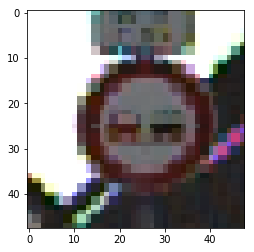

In [69]:
import numpy as np
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# provide the full image path
# path = '/content/beautiful-1274056_1920.jpg'
# path = '/content/worried-girl-413690_640.jpg'
# path = '/content/horse-1804425_640.jpg'

path = all_img_paths[10000]
print(path)

# plt.imshow(img)

img = image.load_img(path, target_size=(48, 48))

plt.imshow(img)
  
image = image.img_to_array(img)  # convert image to an array
print(image.shape)

image = np.expand_dims(image, axis=0)  # increase the no. of dimension by 1
print(image.shape)

classes = model.predict(image, batch_size=1)
print(classes)